# CNN 틀

# 데이터셋


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from tensorflow.keras import datasets, layers, models

# 데이터 전처리

sino_0의 값 중 최대값 : 195.1
sino_1의 값 중 최대값 : 35964.4
sino_2의 값 중 최대값 : 49263.0
sino_3의 값 중 최대값 : 50152.7
sino_4의 값 중 최대값 : 47762.6
sino_5의 값 중 최대값 : 94.7
sino_6의 값 중 최대값 : 102.1
sino_7의 값 중 최대값 : 43668.5
sino_8의 값 중 최대값 : 1338886.2


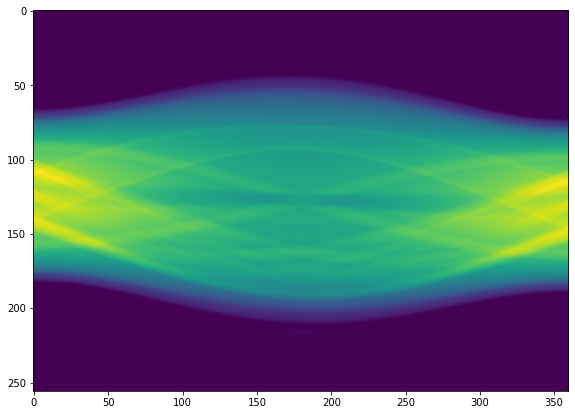

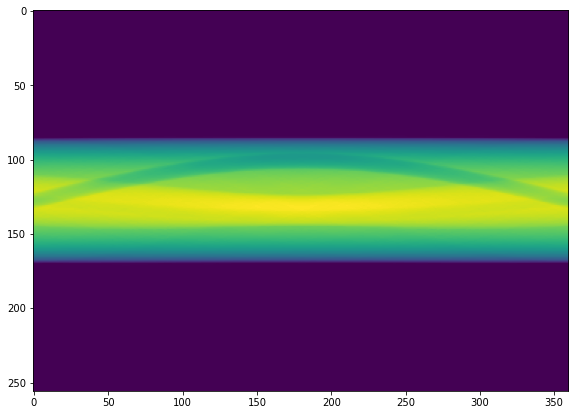

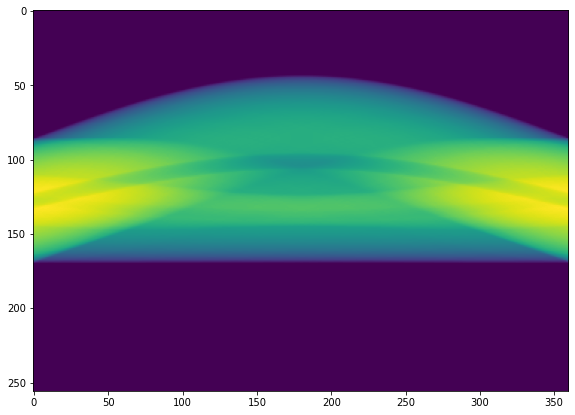

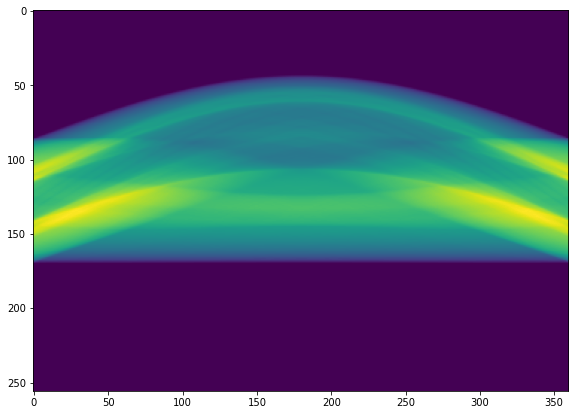

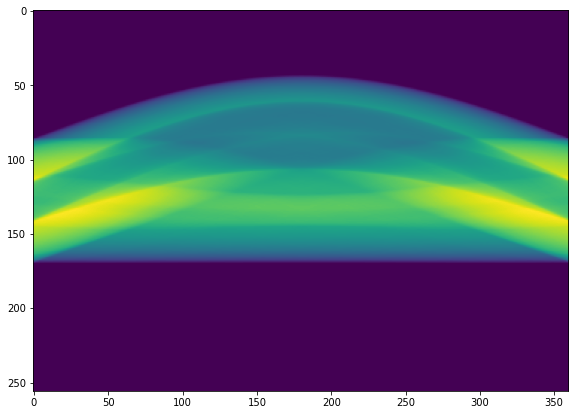

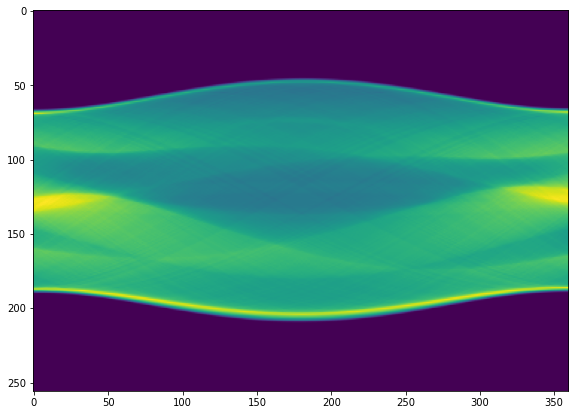

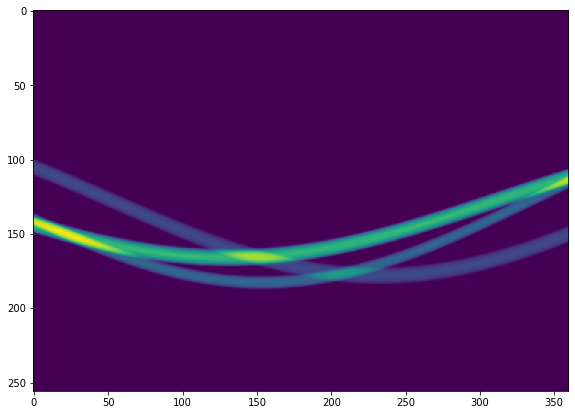

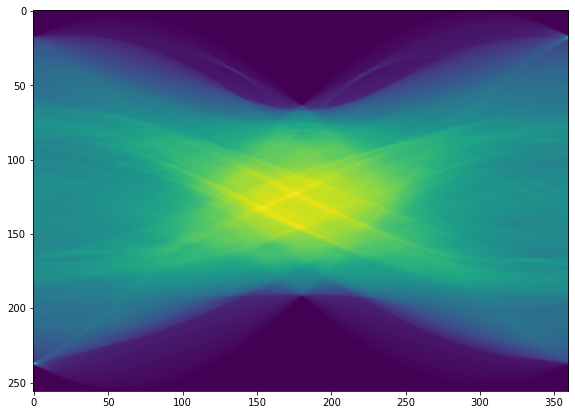

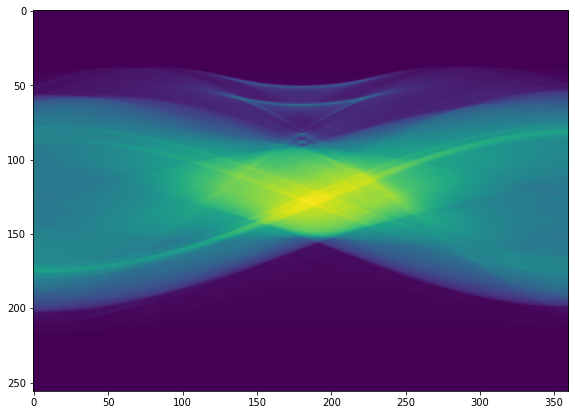

In [2]:
for num in range(0, 9):
  globals()['df{}'.format(num)] = pd.read_table('./images/sino_examples/sino_{}.txt'.format(num),sep=',', header = None)
  print('sino_{}의 값 중 최대값 : {}'.format(num, round(globals()['df{}'.format(num)].max().max(), 1)))
  plt.figure(figsize = (15, 7))
  plt.imshow(globals()['df{}'.format(num)])
  plt.colorbar;

sino_0 ~ sino_8 각 값의 최대값으로 정규화

sino_0의 값 중 최대값 : 1
sino_1의 값 중 최대값 : 1
sino_2의 값 중 최대값 : 1
sino_3의 값 중 최대값 : 1
sino_4의 값 중 최대값 : 1
sino_5의 값 중 최대값 : 1
sino_6의 값 중 최대값 : 1
sino_7의 값 중 최대값 : 1
sino_8의 값 중 최대값 : 1


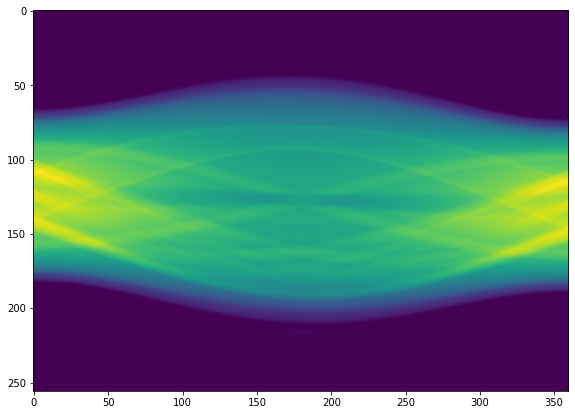

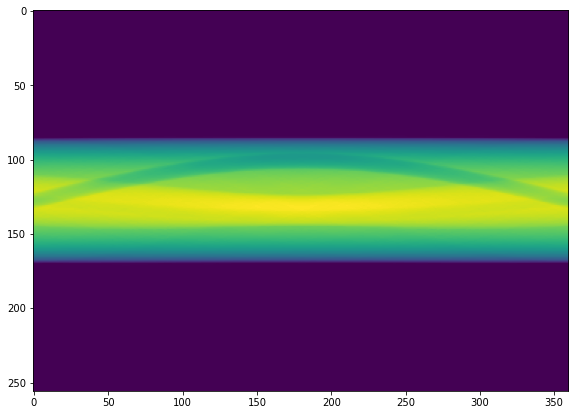

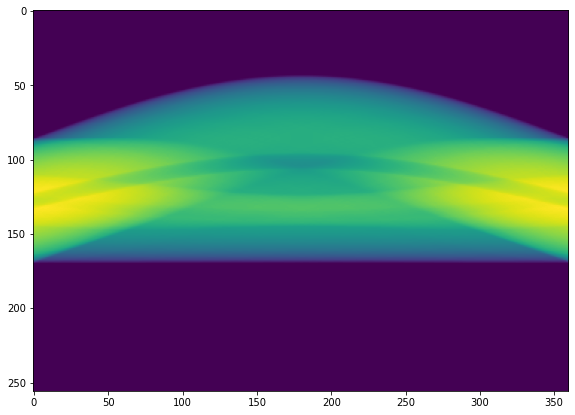

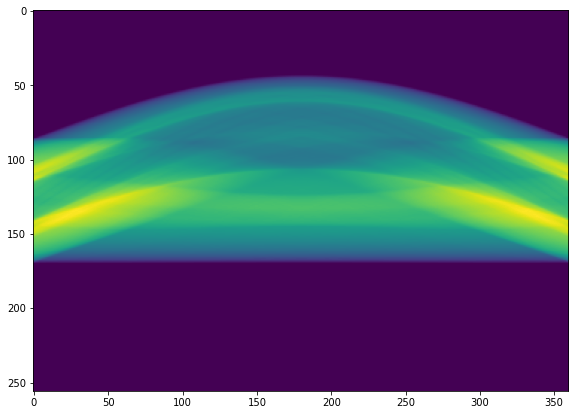

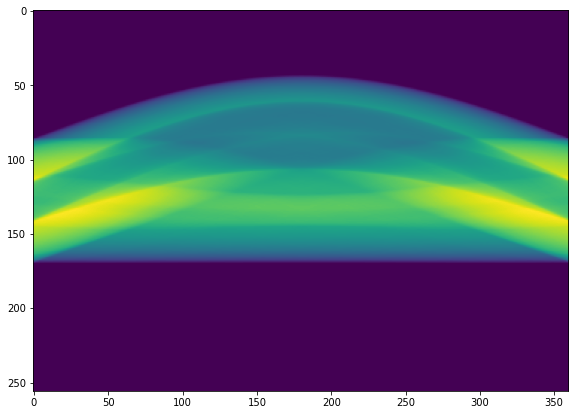

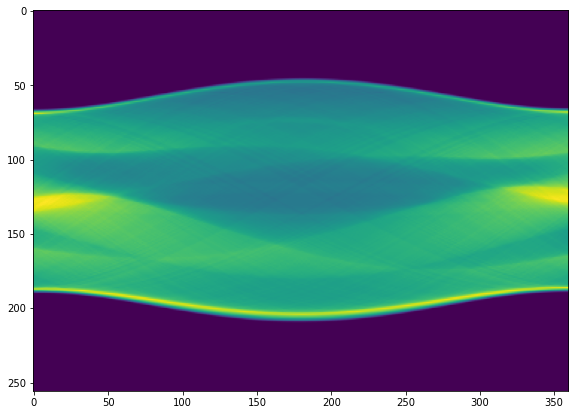

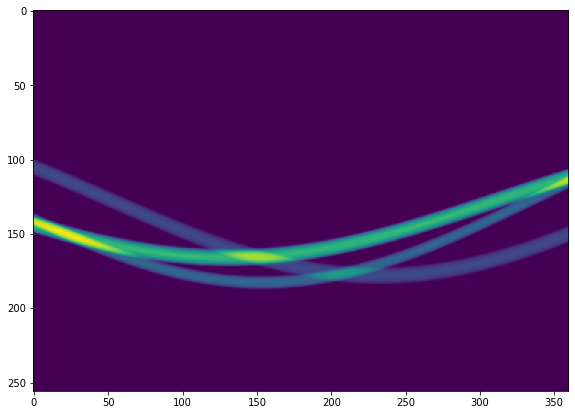

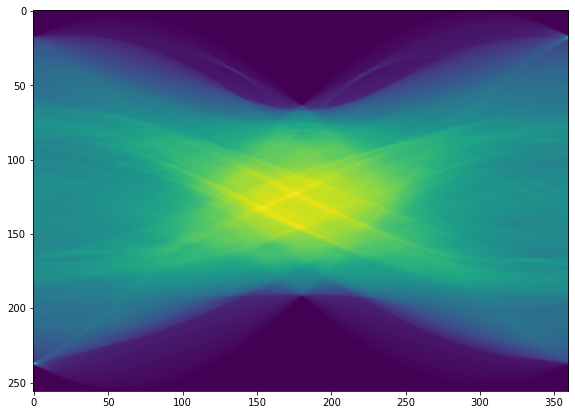

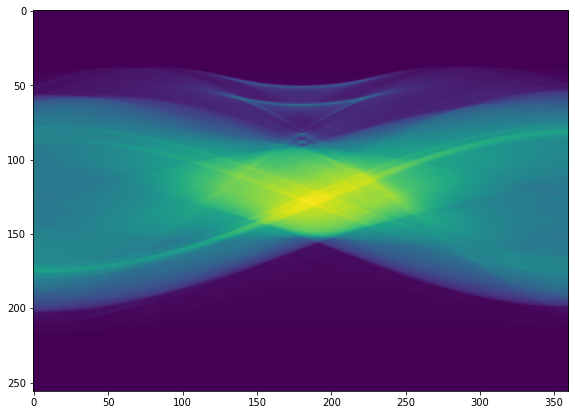

In [3]:
for num in range(0, 9):
  globals()['df{}'.format(num)] = globals()['df{}'.format(num)] / math.ceil(globals()['df{}'.format(num)].max().max())
  print('sino_{}의 값 중 최대값 : {}'.format(num, round(globals()['df{}'.format(num)].max().max())))
  plt.figure(figsize = (15, 7))
  plt.imshow(globals()['df{}'.format(num)])
  plt.colorbar;

In [5]:
# train셋, test셋으로 나누어 줍니다. X는 입력 변수, y는 출력 변수
X_train_org, X_test_org, y_train_org, y_test_org = [], [], [], []

# X 형태 (6, 6), y 형태 (5)
for num in range(1, 9):
  for i in range(360 - 6):
    for j in range(256 - (6 + 5)):
      X_train_org.append(pd.concat([globals()['df{}'.format(num)].iloc[j:j+3, 0+i:6+i], globals()['df{}'.format(num)].iloc[j+3+5:j+3+5+3, 0+i:6+i]], axis = 0))
      y_train_org.append(globals()['df{}'.format(num)].iloc[j+3:j+3+5, i+int(6/2)])

In [6]:
for i in range(360 - 6):
  X_test_org.append(pd.concat([df0.iloc[117:120, 0+i:6+i], df0.iloc[125:128, 0+i:6+i]], axis = 0))
  y_test_org.append(df0.iloc[120:125, i+int(6/2)])

# np.array 형태로 변환 합니다.
X_train_org, X_test_org, y_train_org, y_test_org = np.array(X_train_org), np.array(X_test_org), np.array(y_train_org), np.array(y_test_org)
X_train_org.shape, X_test_org.shape, y_train_org.shape, y_test_org.shape

((693840, 6, 6), (354, 6, 6), (693840, 5), (354, 5))

In [7]:
# RGB 값을 추가 합니다. 우선 흑백으로 설정 하였습니다.
# train 형태 : ((8*354*245, 6, 6, 1)), test 형태 : ((354, 6, 6, 1))
# tensorflow는 3차원만 지원하므로 3차원 형태로 reshape 해줘야 합니다.
X_train = X_train_org.reshape((8*354*245, 6, 6, 1))
X_test = X_test_org.reshape((354, 6, 6, 1))
y_train = y_train_org
y_test = y_test_org

# 모델

In [10]:
model = models.Sequential()
# Conv2D(feature, filter, activation, input_shape)
# feature 수만큼 그림을 만듦
# input_shape의 형태에서 filter 값의 -1 만큼 줄어든 상태로 output이 나옴
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(6, 6, 1)))
# MaxPooling2D(filter)
# filter안의 최대값을 추출해서 크기를 줄임. 저희는 안해도 될듯!
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((1, 1)))
# model.add(layers.Conv2D(64, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 4, 4, 32)          320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 35,589
Trainable params: 35,589
Non-trainable params: 0
_________________________________________________________________


In [12]:
# model 구성
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(X_test, y_test, epochs=1000)

Epoch 1/1000
12/12 [==============================] - 1s 4ms/step - loss: 0.3191 - accuracy: 0.4294
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.2627
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.1977
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.1751
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.2881
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.6354e-04 - accuracy: 0.1695
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.6283e-04 - accuracy: 0.3305
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.2382e-04 - accuracy: 0.4011
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.0453e-04 - accuracy: 0.3249
Epoch 10/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.8647e-0

# 결과

In [13]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)      # test 데이터를 넣었을 때의 loss, acc

12/12 - 0s - loss: 9.8324e-05 - accuracy: 0.7429


In [14]:
print(test_acc)   # 정확도

0.7429378628730774


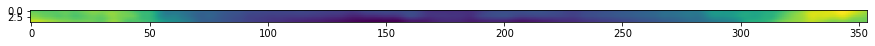

In [15]:
# 모델 예측
pred = model.predict(X_test)    # 예측 데이터를 ()안에 넣으면 됩니다.
plt.figure(figsize = (15, 7))
plt.imshow(pred.T)
plt.colorbar;

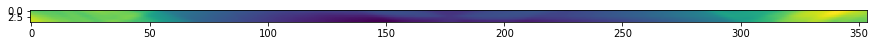

In [16]:
# 예측 결과 확인
plt.figure(figsize = (15, 7))
plt.imshow(y_test_org.T)        # 예측 결과 값을 () 안에 넣으면 됩니다.
plt.colorbar;

In [44]:
pred[0], y_test_org[0]

(array([0.8610078 , 0.87542915, 0.88337725, 0.897967  , 0.9243698 ],
       dtype=float32),
 array([0.86654581, 0.89181077, 0.9177907 , 0.93045368, 0.93588836]))

결과 이미지 비교

In [31]:
df_test_img = df0
pred.T.shape, df_test_img.iloc[120:125, 0+3:360-3].shape

((5, 354), (5, 354))

In [32]:
df_test_img.iloc[120:125, 0+3:360-3] = pred.T

예측

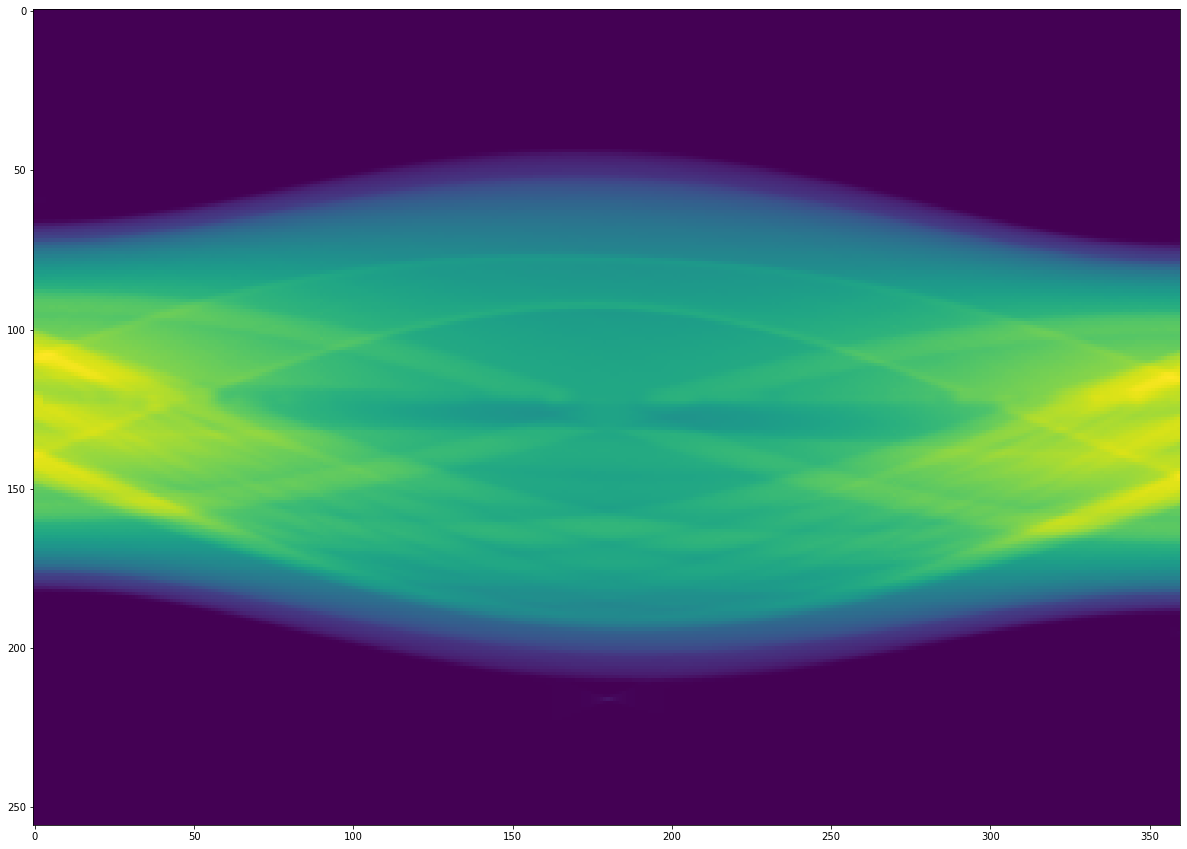

In [38]:
plt.figure(figsize = (30, 15))
plt.imshow(df_test_img)
plt.colorbar;

원본

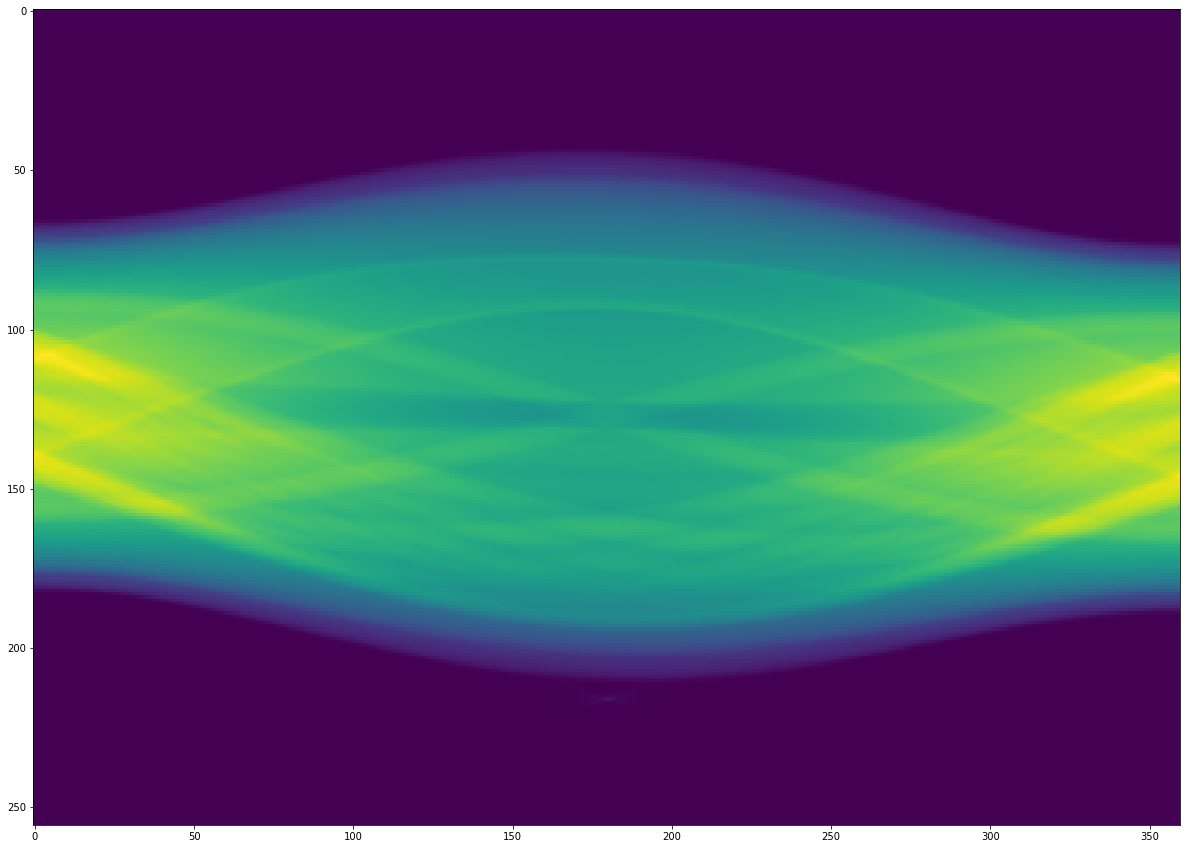

In [40]:
df0 = pd.read_table('./images/sino_examples/sino_0.txt',sep=',', header = None)
plt.figure(figsize = (30, 15))
plt.imshow(df0)
plt.colorbar;